This script computes the climatic fragility considering these aspects:
- Percentage of area with nature-based green solutions (such as public parks, urban forests, street trees... ) 
- Percentage of area with blue nature-based solutions (ponds, lakes, rivers...)
- Climate shelters score (if any)
- Percentage of heat island

### 0. Libraries

In [ ]:
import geopandas as gpd
import rasterio
from rasterio.mask import mask
from shapely.geometry import box
import numpy as np


### 1. Indicator for Climate fragility
Select only fully covered statistical areas

In [35]:
# Load the shapefile containing the statistical areas of Comune di Bologna
areas_gdf = gpd.read_file(r"D:\Meteoblue\aree-statistiche.shp")

In [37]:
# Open the TIFF file
with rasterio.open(r"D:\Meteoblue\Air_temperature_Bologna\Estati_22_23\reprojected_bologna\reprojected_bologna_2022060116Z.tif") as src:   # file of meteoblue about temperature
 # Get the bounds of the raster
    raster_bounds = src.bounds

    # Create a bounding box polygon from the raster bounds
    raster_box = box(raster_bounds.left, raster_bounds.bottom, raster_bounds.right, raster_bounds.top)

    # Check if each area is fully contained within the raster's bounding box
    fully_covered_mask = areas_gdf.geometry.within(raster_box)


In [38]:
# Filter the areas GeoDataFrame to include only fully covered areas
fully_covered_areas_gdf = areas_gdf[fully_covered_mask]

<Axes: >

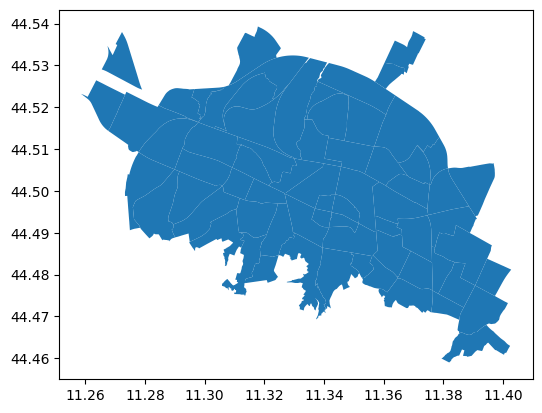

In [39]:
fully_covered_areas_gdf.plot()

In [40]:
print(list(fully_covered_areas_gdf['area_statis']))

['TRIUMVIRATO-PIETRA', 'CASTELDEBOLE', 'BATTINDARNO', 'LUNGO RENO', 'OSPEDALE BELLARIA', 'MEZZOFANTI', 'PESCAROLA', 'BEVERARA', 'MALPIGHI-1', 'STADIO-MELONCELLO', 'CASERME ROSSE-MANIFATTURA', 'CNR', 'ARCOVEGGIO', 'VIA FERRARESE', "PIAZZA DELL'UNITA'", 'BARGELLINO', 'EMILIA PONENTE', "OSPEDALE SANT'ORSOLA", 'MENGOLI', 'GUELFA', 'PRATI DI CAPRARA-OSPEDALE MAGGIORE', 'SCALO RAVONE', 'VIA VITTORIO VENETO', 'AGUCCHI', 'VIA DEL LAVORO', 'FOSSOLO', 'PONTEVECCHIO', 'GALVANI-1', 'GALVANI-2', 'DUCATI-VILLAGGIO INA', 'BORGO CENTRO', 'MULINO DEL GOMITO', 'OSSERVANZA', 'VILLAGGIO DELLA BARCA', 'SAN MICHELE IN BOSCO', 'GIARDINI MARGHERITA', 'LAZZARETTO', 'CANALE DI RENO', 'VIA ARNO', 'CIRENAICA', 'LA DOZZA', 'SAN GIUSEPPE', 'VIA DEL GENIO', 'VELODROMO', 'MICHELINO', 'VIA MONDO', 'IRNERIO-1', 'MARCONI-2', 'LA BIRRA', 'SIEPELUNGA', 'DAGNINI', 'MALPIGHI-2', 'CHIESANUOVA', 'XXI APRILE', 'EX MERCATO ORTOFRUTTICOLO', 'SCANDELLARA', 'VIA LARGA', 'MARCONI-1', 'RAVONE', 'ZANARDI', 'SAN DONNINO', 'DUE MADONNE

In [41]:
fully_covered_areas_gdf.shape

(68, 7)

In [ ]:
# Save the fully covered areas to a new shapefile
fully_covered_areas_gdf.to_file(r"D:\Meteoblue\covered_areas.shp")

#### 1.1 Percentage of Green nature-based solutions

In [42]:
# Load shapefiles
covered_areas = gpd.read_file(r"D:\Meteoblue\covered_areas.shp")   # statistical areas of bologna
green = gpd.read_file(r"D:\Bologna_DBSN\Bologna_dbsn_selected\Unione_all_gree_area.shp")  # green areas of bologna


In [43]:
# Check crs
if covered_areas.crs != green.crs:
    raise ValueError('different crs!')

In [ ]:
covered_areas['green%'] = covered_areas.geometry.apply(lambda x: (x.intersection(green.unary_union).area / x.area) * 100)

In [45]:
covered_areas.head()

,codice_are,area_stati,cod_quar,quartiere,cod_zona,zona,geometry,green%
0,9,TRIUMVIRATO-PIETRA,11,Borgo Panigale - Reno,C,Borgo Panigale,"POLYGON ((11.29699 44.51663, 11.29740 44.51652...",64.106510
1,11,CASTELDEBOLE,11,Borgo Panigale - Reno,C,Borgo Panigale,"POLYGON ((11.28826 44.50371, 11.28808 44.50357...",57.784692
2,37,BATTINDARNO,11,Borgo Panigale - Reno,A,Barca,"POLYGON ((11.30337 44.50128, 11.30366 44.50117...",54.386370
3,6,LUNGO RENO,11,Borgo Panigale - Reno,C,Borgo Panigale,"POLYGON ((11.30661 44.52489, 11.30653 44.52477...",65.579211
4,86,OSPEDALE BELLARIA,16,Savena,N,Mazzini,"POLYGON ((11.39674 44.46646, 11.39726 44.46607...",63.030694


In [46]:
# Save the result
covered_areas.to_file("D:/Climatic_fragility/green_percentage.shp")

#### 1.2 Percentage of Blue nature-based solutions

In [50]:
# Load shapefiles
covered_areas = gpd.read_file("D:/Climatic_fragility/green_percentage.shp")   # statistical areas of bologna + percentage of green
blue = gpd.read_file("D:/Climatic_fragility/idrografia/all_blue_area.shp")  # blue areas of bologna

In [51]:
# Check crs
if covered_areas.crs != blue.crs:
    raise ValueError('different crs!')

In [ ]:
covered_areas['blue%'] = covered_areas.geometry.apply(lambda x: (x.intersection(blue.unary_union).area / x.area) * 100)

In [53]:
covered_areas.head()

,codice_are,area_stati,cod_quar,quartiere,cod_zona,zona,green%,geometry,blue%
0,9,TRIUMVIRATO-PIETRA,11,Borgo Panigale - Reno,C,Borgo Panigale,64.106510,"POLYGON ((11.29699 44.51663, 11.29740 44.51652...",2.515611
1,11,CASTELDEBOLE,11,Borgo Panigale - Reno,C,Borgo Panigale,57.784692,"POLYGON ((11.28826 44.50371, 11.28808 44.50357...",4.217511
2,37,BATTINDARNO,11,Borgo Panigale - Reno,A,Barca,54.386370,"POLYGON ((11.30337 44.50128, 11.30366 44.50117...",0.000000
3,6,LUNGO RENO,11,Borgo Panigale - Reno,C,Borgo Panigale,65.579211,"POLYGON ((11.30661 44.52489, 11.30653 44.52477...",8.792652
4,86,OSPEDALE BELLARIA,16,Savena,N,Mazzini,63.030694,"POLYGON ((11.39674 44.46646, 11.39726 44.46607...",0.649383


In [54]:
covered_areas.to_file("D:/Climatic_fragility/green_blue_percentage.shp")

#### 1.3 Number of Climate Shelters and their scores


In [55]:
# Load shapefiles
covered_areas = gpd.read_file("D:/Climatic_fragility/green_blue_percentage.shp")   # statistical areas of bologna + blue and green percentage
climate_shelters = gpd.read_file("D:/Climate_Shelter_Index/isocrona/CSI/CSI.shp")

In [ ]:
# Spatially join the two shapefiles to count the number of climatic refuges in each statistical area
joined = gpd.sjoin(covered_areas, climate_shelters, how="left", op="contains")

In [57]:
# Group by the statistical areas and count the number of refuges in each area
cs_counts = joined.groupby('codice_are')['CSI'].count().reset_index(name='CS')

In [58]:
# Group by the statistical areas and calculate the average 'CSI' score for refuges in each area
cs_avg = joined.groupby('codice_are')['CSI'].mean().reset_index()

In [59]:
# Fill NaN values with 0
cs_avg['CSI'].fillna(0, inplace=True)

In [60]:
# Merge the 'CS' counts back into covered_areas based on the statistical area
covered_areas = covered_areas.merge(cs_counts, on='codice_are', how='left')

In [61]:
# Merge the 'CSI' averages back into covered_areas based on the statistical area
covered_areas = covered_areas.merge(cs_avg, on='codice_are', how='left')

In [62]:
covered_areas.rename(columns={'CSI': 'CSI_avg'}, inplace=True)

In [63]:
covered_areas.head()

,codice_are,area_stati,cod_quar,quartiere,cod_zona,zona,green%,blue%,geometry,CS,CSI_avg
0,9,TRIUMVIRATO-PIETRA,11,Borgo Panigale - Reno,C,Borgo Panigale,64.106510,2.515611,"POLYGON ((11.29699 44.51663, 11.29740 44.51652...",16,0.338767
1,11,CASTELDEBOLE,11,Borgo Panigale - Reno,C,Borgo Panigale,57.784692,4.217511,"POLYGON ((11.28826 44.50371, 11.28808 44.50357...",19,0.307594
2,37,BATTINDARNO,11,Borgo Panigale - Reno,A,Barca,54.386370,0.000000,"POLYGON ((11.30337 44.50128, 11.30366 44.50117...",28,0.248717
3,6,LUNGO RENO,11,Borgo Panigale - Reno,C,Borgo Panigale,65.579211,8.792652,"POLYGON ((11.30661 44.52489, 11.30653 44.52477...",0,0.000000
4,86,OSPEDALE BELLARIA,16,Savena,N,Mazzini,63.030694,0.649383,"POLYGON ((11.39674 44.46646, 11.39726 44.46607...",3,0.278112


In [64]:
# Save shapefile
covered_areas.to_file("D:/Climatic_fragility/g_b_csi.shp")

#### 1.4 Percentage of Heat Island

In [119]:
# Load the shapefile
covered_areas = gpd.read_file("D:/Climatic_fragility/g_b_csi.shp")   # statistical areas of bologna
hot_cold_spots = gpd.read_file("D:/Meteoblue/Air_temperature_Bologna/Estati_22_23/Hot_Cold_Spot/hot_cold_spots_vector.shp")

In [118]:
# Select hot and cold area
polygons_4 = hot_cold_spots[hot_cold_spots['DN'] == 4]
polygons_1 = hot_cold_spots[hot_cold_spots['DN'] == 1]

In [ ]:
covered_areas['hot_area%'] = covered_areas.geometry.apply(lambda x: (x.intersection(polygons_4.unary_union).area / x.area) * 100)

In [ ]:
covered_areas['cold_area%'] = covered_areas.geometry.apply(lambda x: (x.intersection(polygons_1.unary_union).area / x.area) * 100)

In [123]:
covered_areas.head()

,codice_are,area_stati,cod_quar,quartiere,cod_zona,zona,green%,blue%,CS,CSI_avg,geometry,hot_area%,cold_area%
0,9,TRIUMVIRATO-PIETRA,11,Borgo Panigale - Reno,C,Borgo Panigale,64.106510,2.515611,16,0.338767,"POLYGON ((11.29699 44.51663, 11.29740 44.51652...",47.016418,0.000000
1,11,CASTELDEBOLE,11,Borgo Panigale - Reno,C,Borgo Panigale,57.784692,4.217511,19,0.307594,"POLYGON ((11.28826 44.50371, 11.28808 44.50357...",41.735059,0.000000
2,37,BATTINDARNO,11,Borgo Panigale - Reno,A,Barca,54.386370,0.000000,28,0.248717,"POLYGON ((11.30337 44.50128, 11.30366 44.50117...",65.974661,0.000000
3,6,LUNGO RENO,11,Borgo Panigale - Reno,C,Borgo Panigale,65.579211,8.792652,0,0.000000,"POLYGON ((11.30661 44.52489, 11.30653 44.52477...",17.813553,0.336931
4,86,OSPEDALE BELLARIA,16,Savena,N,Mazzini,63.030694,0.649383,3,0.278112,"POLYGON ((11.39674 44.46646, 11.39726 44.46607...",0.500572,58.199828


In [124]:
# Save shapefile
covered_areas.to_file("D:/Climatic_fragility/g_b_csi_hot_cold.shp")

### 2. Climate Fragility

In [17]:
# load shapefile
indicators = gpd.read_file("D:/Climatic_fragility/g_b_csi_hot_cold.shp")

In [18]:
# Normalize indicator
indicators_to_normalize = ['green%', 'blue%', 'hot_area%', 'cold_area%']
indicators[indicators_to_normalize] = indicators[indicators_to_normalize] / 100


In [19]:
# Calculate fragility index
indicators['fragility'] = 1 - ((indicators['green%'] + indicators['blue%'] + indicators['CSI_avg'] 
                                + indicators['cold_area%']) - indicators['hot_area%'])

In [24]:
# Identify min and max value of fragility
min_value = indicators['fragility'].min()
max_value = indicators['fragility'].max()

In [25]:
# Normalize the fragility index
indicators['Nfragility']= (indicators['fragility'] - min_value) / (max_value - min_value)

In [31]:
indicators.head()

,codice_are,area_stati,cod_quar,quartiere,cod_zona,zona,green%,blue%,CS,CSI_avg,hot_area%,cold_area%,geometry,fragility,Nfragility
0,9,TRIUMVIRATO-PIETRA,11,Borgo Panigale - Reno,C,Borgo Panigale,0.641065,0.025156,16,0.338767,0.470164,0.000000,"POLYGON ((11.29699 44.51663, 11.29740 44.51652...",0.465176,0.492986
1,11,CASTELDEBOLE,11,Borgo Panigale - Reno,C,Borgo Panigale,0.577847,0.042175,19,0.307594,0.417351,0.000000,"POLYGON ((11.28826 44.50371, 11.28808 44.50357...",0.489734,0.501508
2,37,BATTINDARNO,11,Borgo Panigale - Reno,A,Barca,0.543864,0.000000,28,0.248717,0.659747,0.000000,"POLYGON ((11.30337 44.50128, 11.30366 44.50117...",0.867166,0.632479
3,6,LUNGO RENO,11,Borgo Panigale - Reno,C,Borgo Panigale,0.655792,0.087927,0,0.000000,0.178136,0.003369,"POLYGON ((11.30661 44.52489, 11.30653 44.52477...",0.431048,0.481143
4,86,OSPEDALE BELLARIA,16,Savena,N,Mazzini,0.630307,0.006494,3,0.278112,0.005006,0.581998,"POLYGON ((11.39674 44.46646, 11.39726 44.46607...",-0.491905,0.160872


In [32]:
# Save shapefile
indicators.to_file("D:/Climatic_fragility/climate_fragility_index.shp")